In [90]:
import pandas as pd
# Importando el set de datos
videogames = pd.read_csv("C:\\Users\\Miguel Rodríguez\\Desktop\\A2 Capacitación\\Python\\Análisis exploratorio de datos\\imdb-videogames.csv")
# Eliminando columnas que considero innecesarias
videogames = videogames.drop(["url", "plot", "Unnamed: 0"], axis=1)
# Eliminando valores nulos
videogames = videogames.dropna()
# Cambiando el tipo de dato y reemplazando algunos caracteres
videogames["year"] = videogames["year"].astype("str").str.replace(".0$","")
videogames["votes"] = videogames["votes"].str.replace(",", "").astype("int")

C:\Users\Miguel Rodríguez\AppData\Local\Temp\ipykernel_21096\3943790572.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  videogames["year"] = videogames["year"].astype("str").str.replace(".0$","")


*El siguiente código reemplaza todos los true por 1 y false 0*

In [91]:
columnas = videogames.iloc[:, 5:]
for columna in columnas:
    videogames[columna] = videogames[columna].replace(True,1).replace(False,0)

In [93]:
videogames.head(10)

,name,year,certificate,rating,votes,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
0,Spider-Man,2018,T,9.2,20759,1,1,0,0,0,1,0,0,0
1,Red Dead Redemption II,2018,M,9.7,35703,1,1,0,1,0,0,0,0,0
2,Grand Theft Auto V,2013,M,9.5,59986,1,0,0,1,0,0,0,0,0
3,God of War,2018,M,9.6,26118,1,1,0,0,0,0,0,0,0
4,Uncharted 4: A Thief's End,2016,T,9.5,28722,1,1,0,0,0,0,0,0,0
5,The Last of Us: Part II,2020,M,8.5,30460,1,1,0,0,0,0,0,0,0
6,Horizon Forbidden West,2022,T,9.2,2979,1,1,0,0,0,0,1,0,0
7,The Last of Us,2013,M,9.7,60590,1,1,0,0,0,0,0,0,0
8,Detroit: Become Human,2018,M,9.2,16907,1,1,0,0,0,0,0,0,0
9,Death Stranding,2019,M,8.8,8136,1,1,0,0,0,0,0,0,0


In [94]:
group_year = round(videogames.groupby("year").mean().sort_values(by="votes", ascending=False), 1)
group_year.iloc[:, 1:2].head(10)

,votes
year,
2013,2752.6
2011,2569.9
2018,2015.9
2009,1783.0
2015,1743.5
2007,1606.3
2010,1568.9
2020,1536.8
2008,1531.9


*Conclusión: El 2013 fue el año con el mayor promedio de votaciones por vídeo juego, donde se obtuvo aproximadamente 2752 votaciones, seguido del 2011 con 2569*

In [95]:
group_year = videogames.groupby("year").count()

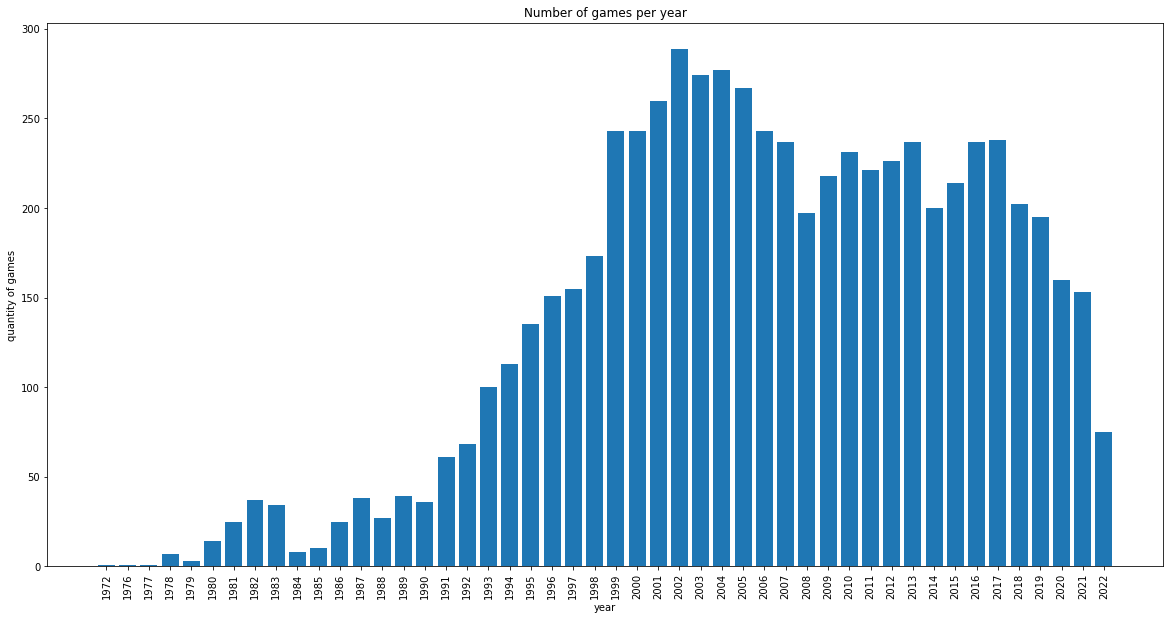

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 10))
plt.bar(group_year.index, group_year["name"])
plt.xticks(rotation=90)
plt.xlabel("year")
plt.ylabel("quantity of games")
plt.title("Number of games per year")
plt.show()

*Conclusión: Se observa que el año 2002 fue el año con mayor número de votos*

In [96]:
group_rating = videogames.groupby("rating").count().sort_values(by="name", ascending=False)
result = group_rating.iloc[:, 0:1]
total_videogames = result["name"].sum()
result["total_percentage"] = round((result["name"]/total_videogames)*100, 2)
result = pd.DataFrame(result)
result

C:\Users\Miguel Rodríguez\AppData\Local\Temp\ipykernel_21096\4204010118.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result["total_percentage"] = round((result["name"]/total_videogames)*100, 2)


,name,total_percentage
rating,,
7.4,283,4.29
7.8,267,4.05
7.6,266,4.03
7.2,257,3.89
7.5,256,3.88
...,...,...
2.7,1,0.02
1.7,1,0.02
2.0,1,0.02


*Se concluye que la mayoría de los vídeo juegos registrados tienen una calificación del 7.4, y se observa que corresponde al 4.3% del total*